# Stock Market Prediction using  Numerical and Textual Analysis (Level - Advanced) 


# Nikhil H V

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pandas import datetime
from datetime import datetime 



In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving crude_oil.csv to crude_oil.csv


In [ ]:
data1 = pd.read_csv('crude_oil.csv')
data1
#close column means-> The closing price of a stock is the price of that stock at the close of the trading day. 

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Oct 15, 2021",81.48,82.66,81.39,82.28,82.28,"3,99,813"
1,"Oct 14, 2021",80.59,81.68,80.38,81.31,81.31,"3,99,813"
2,"Oct 13, 2021",80.58,81.04,79.42,80.44,80.44,"4,87,220"
3,"Oct 12, 2021",80.5,81.62,79.47,80.64,80.64,"5,98,181"
4,"Oct 11, 2021",79.59,82.18,79.55,80.52,80.52,"6,53,756"
...,...,...,...,...,...,...,...
247,"Oct 22, 2020",40.04,41.02,39.71,40.64,40.64,"3,07,494"
248,"Oct 21, 2020",41.22,41.59,39.78,40.03,40.03,"3,66,899"
249,"Oct 20, 2020",40.65,41.7,40.25,41.46,41.46,"3,60,574"
250,"Oct 19, 2020",40.69,41.22,40.54,40.83,40.83,"75,335"


In [ ]:
data1.shape

(252, 7)

In [ ]:
data1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    object 
 2   High       252 non-null    object 
 3   Low        252 non-null    object 
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    object 
dtypes: float64(2), object(5)
memory usage: 13.9+ KB


In [ ]:
data1.describe()

,Close,Adj Close
count,252.000000,252.000000
mean,61.088373,61.084524
std,11.355892,11.360495
min,35.790000,35.790000
25%,52.547500,52.547500
50%,63.580000,63.580000
75%,69.967500,69.967500
max,82.280000,82.280000


In [ ]:
stock = data1.loc[:,['Date','Close']]
stock

,Date,Close
0,"Oct 15, 2021",82.28
1,"Oct 14, 2021",81.31
2,"Oct 13, 2021",80.44
3,"Oct 12, 2021",80.64
4,"Oct 11, 2021",80.52
...,...,...
247,"Oct 22, 2020",40.64
248,"Oct 21, 2020",40.03
249,"Oct 20, 2020",41.46
250,"Oct 19, 2020",40.83


In [ ]:
stock['Date'] = pd.to_datetime(stock['Date'])
#stock.reset_index()
stock

,Date,Close
0,2021-10-15,82.28
1,2021-10-14,81.31
2,2021-10-13,80.44
3,2021-10-12,80.64
4,2021-10-11,80.52
...,...,...
247,2020-10-22,40.64
248,2020-10-21,40.03
249,2020-10-20,41.46
250,2020-10-19,40.83


In [ ]:
stock1 = pd.DataFrame(stock['Close'])
stock1.set_index(stock['Date'])

,Close
Date,
2021-10-15,82.28
2021-10-14,81.31
2021-10-13,80.44
2021-10-12,80.64
2021-10-11,80.52
...,...
2020-10-22,40.64
2020-10-21,40.03
2020-10-20,41.46


In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   Close   252 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


Text(0, 0.5, 'Close')

<Figure size 432x432 with 0 Axes>

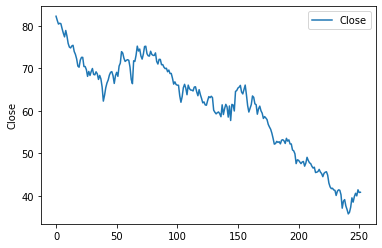

In [ ]:
#plt.figure(figsize=(10, 6))
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
#plt.figure(figsize=(10,10))
st = pd.DataFrame(stock['Close'])
st.astype(float)
st.plot()
plt.ylabel('Close')

Text(0, 0.5, 'Adj Close')

<Figure size 432x432 with 0 Axes>

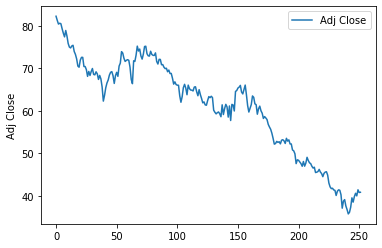

In [ ]:
#plt.figure(figsize=(10, 6))
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
#plt.figure(figsize=(10,10))
st = pd.DataFrame(data1['Adj Close'])
st.astype(float)
st.plot()
plt.ylabel('Adj Close')

In [ ]:
#sales_diff = sales.diff(periods=1)
stock_diff = stock1.diff(periods=1)

In [ ]:
stock_diff

,Close
0,NaN
1,-0.97
2,-0.87
3,0.20
4,-0.12
...,...
247,0.79
248,-0.61
249,1.43
250,-0.63


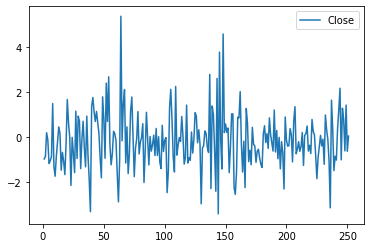

In [ ]:
stock_diff.plot()

In [ ]:
X = stock1.values
train = X[0:176]
test = X[176:]
predictions = []

In [ ]:
from statsmodels.tsa.ar_model import AR
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [ ]:
predictions = model_ar_fit.predict(start=176,end=252)

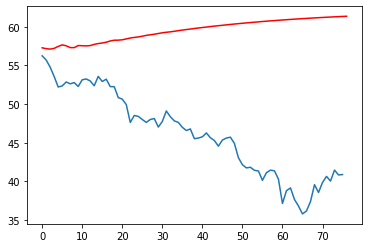

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model_arima=ARIMA(stock1,(1,2,0))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

943.2211739310518


In [ ]:
prediction_arima=model_arima_fit.forecast(75)[0]
prediction_arima

array([40.60909819, 40.49633364, 40.31243468, 40.16713244, 40.00790878,
       39.85989928, 39.71107386, 39.56719021, 39.42549265, 39.28730007,
       39.15198124, 39.01983828, 38.89072658, 38.76471536, 38.64177149,
       38.52191082, 38.40512577, 38.29141997, 38.18079168, 38.07324173,
       37.96876972, 37.86737585, 37.76906002, 37.67382228, 37.5816626 ,
       37.492581  , 37.40657747, 37.32365201, 37.24380463, 37.16703532,
       37.09334408, 37.02273091, 36.95519582, 36.89073879, 36.82935985,
       36.77105897, 36.71583617, 36.66369144, 36.61462478, 36.56863619,
       36.52572568, 36.48589324, 36.44913887, 36.41546257, 36.38486435,
       36.3573442 , 36.33290212, 36.31153812, 36.29325218, 36.27804432,
       36.26591454, 36.25686282, 36.25088918, 36.24799361, 36.24817611,
       36.25143669, 36.25777534, 36.26719206, 36.27968685, 36.29525972,
       36.31391066, 36.33563967, 36.36044675, 36.38833191, 36.41929514,
       36.45333644, 36.49045581, 36.53065326, 36.57392878, 36.62

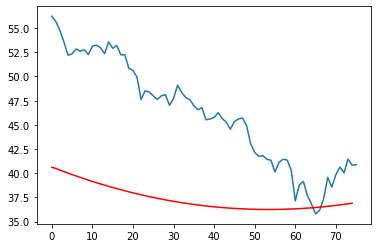

In [ ]:
plt.plot(test)
plt.plot(prediction_arima,color='red')

# Textual Analysis

In [ ]:
from google.colab import files 
uploaded = files.upload() 

Saving india-news-headlines.csv to india-news-headlines.csv


In [ ]:
data = pd.read_csv('india-headline_text-headlines.csv')
data

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [ ]:
data.shape

(3424067, 3)

In [ ]:
data.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [ ]:
data.describe()

,publish_date
count,3.424067e+06
mean,2.012659e+07
std,4.981132e+04
min,2.001010e+07
25%,2.009113e+07
50%,2.013092e+07
75%,2.017013e+07
max,2.020123e+07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [ ]:
#data.drop(0, inplace=True)
data.drop('headline_category', axis = 1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   publish_date   int64 
 1   headline_text  object
dtypes: int64(1), object(1)
memory usage: 52.2+ MB


In [ ]:
data['publish_date'] = pd.to_datetime(data['publish_date'],format= '%Y%m%d')
data

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424062,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...


In [ ]:
data['headline_text'] = data.groupby(['publish_date']).transform(lambda x : ' '.join(x)) 
data = data.drop_duplicates() 
data.reset_index(inplace = True, drop = True)
data 

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import re

c = []
for i in range(0,len(data['headline_text'])):
    headline_text = re.sub('[^a-zA-Z]',' ',data['headline_text'][i])
    headline_text = headline_text.lower()
    headline_text = headline_text.split()
    ps = nltk.stem.porter.PorterStemmer()
    headline_text = [ps.stem(word) for word in headline_text if not word in set(stopwords.words('english'))]
    headline_text=' '.join(headline_text)
    c.append(headline_text) 

In [ ]:
data['headline_text'] = pd.Series(c)
data

,publish_date,headline_text
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...
1,2001-01-03,powerless north india grope dark think laxman ...
2,2001-01-04,string pull stephen hawk india vajpaye give bi...
3,2001-01-05,light combat craft take india club class hawk ...
4,2001-01-06,light combat craft take india club class hawk ...
...,...,...
7257,2020-12-27,biginterview dhritiman chatterje nobodi dare m...
7258,2020-12-28,horoscop today decemb check astrolog predict a...
7259,2020-12-29,man recov char remain thief burnt shop dump be...
7260,2020-12-30,numerolog read decemb predict lucki colour luc...


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
data['Subjectivity'] = data['headline_text'].apply(getSubjectivity)
data['Polarity'] = data['headline_text'].apply(getPolarity)
data

,publish_date,headline_text,Subjectivity,Polarity
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074
1,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000
2,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481
3,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404
4,2001-01-06,light combat craft take india club class hawk ...,0.425758,0.389394
...,...,...,...,...
7257,2020-12-27,biginterview dhritiman chatterje nobodi dare m...,0.366994,0.058187
7258,2020-12-28,horoscop today decemb check astrolog predict a...,0.395275,0.085493
7259,2020-12-29,man recov char remain thief burnt shop dump be...,0.399135,0.068856
7260,2020-12-30,numerolog read decemb predict lucki colour luc...,0.389012,0.040116


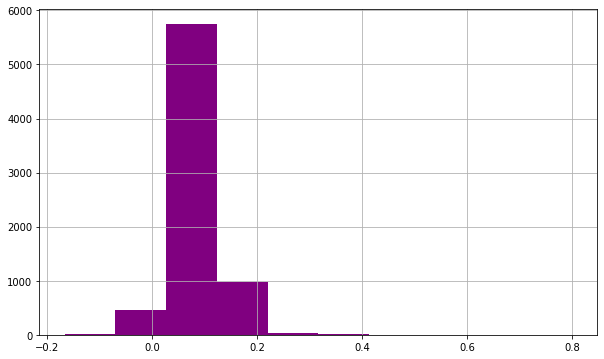

In [ ]:
plt.figure(figsize = (10,6))
data['Polarity'].hist(color = 'purple')

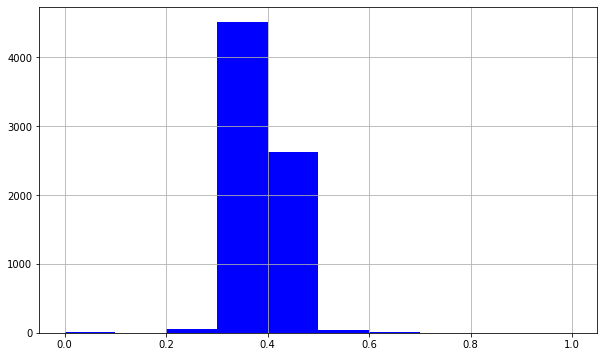

In [ ]:
plt.figure(figsize = (10,6))
data['Subjectivity'].hist(color = 'blue')

In [ ]:
sia = SentimentIntensityAnalyzer()

data['Compound'] = [sia.polarity_scores(v)['compound'] for v in data['headline_text']] 
data['Negative'] = [sia.polarity_scores(v)['neg'] for v in data['headline_text']]
data['Neutral'] = [sia.polarity_scores(v)['neu'] for v in data['headline_text']]
data['Positive'] = [sia.polarity_scores(v)['pos'] for v in data['headline_text']]
data 


In [ ]:
data.rename(columns = {'publish_date': 'Date',}, inplace = True)
data

,Date,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
1,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
2,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
3,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
4,2001-01-06,light combat craft take india club class hawk ...,0.425758,0.389394,-0.7579,0.207,0.649,0.144
...,...,...,...,...,...,...,...,...
7257,2020-12-27,biginterview dhritiman chatterje nobodi dare m...,0.366994,0.058187,-0.9998,0.145,0.786,0.068
7258,2020-12-28,horoscop today decemb check astrolog predict a...,0.395275,0.085493,-0.9996,0.120,0.807,0.074
7259,2020-12-29,man recov char remain thief burnt shop dump be...,0.399135,0.068856,-0.9998,0.145,0.782,0.073
7260,2020-12-30,numerolog read decemb predict lucki colour luc...,0.389012,0.040116,-0.9999,0.149,0.782,0.069


In [ ]:
data1['Date'] = pd.to_datetime(data1['Date'])
print(data1)
data


          Date   Open   High    Low  Close  Adj Close    Volume
0   2021-10-15  81.48  82.66  81.39  82.28      82.28  3,99,813
1   2021-10-14  80.59  81.68  80.38  81.31      81.31  3,99,813
2   2021-10-13  80.58  81.04  79.42  80.44      80.44  4,87,220
3   2021-10-12   80.5  81.62  79.47  80.64      80.64  5,98,181
4   2021-10-11  79.59  82.18  79.55  80.52      80.52  6,53,756
..         ...    ...    ...    ...    ...        ...       ...
247 2020-10-22  40.04  41.02  39.71  40.64      40.64  3,07,494
248 2020-10-21  41.22  41.59  39.78  40.03      40.03  3,66,899
249 2020-10-20  40.65   41.7  40.25  41.46      41.46  3,60,574
250 2020-10-19  40.69  41.22  40.54  40.83      40.83    75,335
251 2020-10-16  40.88  41.05  40.08  40.88      40.88    96,488

[252 rows x 7 columns]


,Date,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
1,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
2,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
3,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
4,2001-01-06,light combat craft take india club class hawk ...,0.425758,0.389394,-0.7579,0.207,0.649,0.144
...,...,...,...,...,...,...,...,...
7257,2020-12-27,biginterview dhritiman chatterje nobodi dare m...,0.366994,0.058187,-0.9998,0.145,0.786,0.068
7258,2020-12-28,horoscop today decemb check astrolog predict a...,0.395275,0.085493,-0.9996,0.120,0.807,0.074
7259,2020-12-29,man recov char remain thief burnt shop dump be...,0.399135,0.068856,-0.9998,0.145,0.782,0.073
7260,2020-12-30,numerolog read decemb predict lucki colour luc...,0.389012,0.040116,-0.9999,0.149,0.782,0.069


In [ ]:
df_merge = pd.merge(data1, data, how='inner', on='Date')
df_merge.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2020-12-31,48.35,48.58,47.77,48.52,48.52,"1,81,894",horoscop today decemb check astrolog predict a...,0.406992,0.103598,-0.9995,0.117,0.810,0.073
1,2020-12-30,48.13,48.66,47.61,48.40,48.40,"2,66,957",numerolog read decemb predict lucki colour luc...,0.389012,0.040116,-0.9999,0.149,0.782,0.069
2,2020-12-29,47.72,48.35,47.68,48.00,48.00,"2,13,778",man recov char remain thief burnt shop dump be...,0.399135,0.068856,-0.9998,0.145,0.782,0.073
3,2020-12-28,48.23,48.96,47.5,47.62,47.62,"2,38,462",horoscop today decemb check astrolog predict a...,0.395275,0.085493,-0.9996,0.120,0.807,0.074
4,2020-12-24,-,-,-,48.00,47.00,-,set mood sex cold winter two hous blow gujarat...,0.386303,0.065157,-0.9995,0.116,0.809,0.075


In [ ]:
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,48.52,0.406992,0.103598,-0.9995,0.117,0.810,0.073
1,48.40,0.389012,0.040116,-0.9999,0.149,0.782,0.069
2,48.00,0.399135,0.068856,-0.9998,0.145,0.782,0.073
3,47.62,0.395275,0.085493,-0.9996,0.120,0.807,0.074
4,48.00,0.386303,0.065157,-0.9995,0.116,0.809,0.075


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.956424,0.839489,0.671129,0.8,0.018519,0.913043,0.410256
1,0.947408,0.647465,0.077506,0.0,0.611111,0.507246,0.307692
2,0.917355,0.755579,0.346260,0.2,0.537037,0.507246,0.410256
3,0.888805,0.714355,0.501830,0.6,0.074074,0.869565,0.435897
4,0.917355,0.618537,0.311665,0.8,0.000000,0.898551,0.461538


In [ ]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(42, 6)

In [ ]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
10,0.886412,0.326701,0.4,0.259259,0.710145,0.435897
27,0.245693,0.568342,0.4,0.074074,0.913043,0.358974
52,0.374506,0.618209,0.4,0.296296,0.652174,0.512821
30,0.524300,0.253875,0.2,0.333333,0.681159,0.384615
37,0.597137,0.348140,0.2,0.351852,0.797101,0.153846
22,0.407728,0.553581,0.2,0.444444,0.710145,0.179487
7,0.494554,0.017531,0.0,0.481481,0.768116,0.025641
14,0.135464,0.210703,0.4,0.203704,0.797101,0.358974
34,0.590591,0.840552,1.0,0.333333,0.333333,1.000000
48,0.429971,0.604287,0.2,0.407407,0.594203,0.435897


In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [ ]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.75335838 0.37064613 0.42168295 0.71205109 0.39664162 0.72126972
 0.54175056 0.3744553  0.43575507 0.59601803]
43    0.028550
32    0.326071
38    0.225394
33    0.400451
11    0.888805
2     0.917355
31    0.416980
41    0.076634
29    0.453043
26    0.546206
Name: Close, dtype: float64
0.10172075879561979


In [ ]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [ ]:
print(mean_squared_error(predictions, y_test))


0.11620000605520925
